<a href="https://colab.research.google.com/github/yajuna/pinn_heat/blob/master/data_study_for_heat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook plots the data we use to study modeling of the heat equation.

Data collected are from Aug 21 to Aug 28, in 2022. We will plot the data of the full 7 days, as well as each day, and compare the changes.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas

from time import time

import sys
print("Python 3 version is", sys.version)
import matplotlib
print("Matplotlib version is", matplotlib.__version__)
print("Tensorflow version is", tf.__version__)
print("Numpy version is", np.__version__)

Python 3 version is 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Matplotlib version is 3.7.1
Tensorflow version is 2.15.0
Numpy version is 1.23.5


In [ ]:
DTYPE = 'float64'
tf.keras.backend.set_floatx(DTYPE)

## Import measured tree temperature data

In [ ]:
colnames_tree_temp = ['datetime', 's45_1', 'e9_1', 'n135_1','e45_2', 'n9_2', 'w135_2', 'n45_3', 'w9_3','s135_3', 'w_ext_35']
url1 = "https://raw.githubusercontent.com/yajuna/linearRegression/master/Tree_Temp_Values_AUG21_to_AUG28_2022.xlsx"
dataTemp = pandas.read_excel(url1,names=colnames_tree_temp)

print(type(dataTemp))
# dataTemp.datetime[2941:2943]

<class 'pandas.core.frame.DataFrame'>


In [ ]:
## index counting and print to check:
date = '08-21'

if date == '08-21':
# August 21:
    [start, stop] = [0, 415]

elif date == '08-22':
# August 22:
    [start, stop] = [415, 826]
elif date == '08-23':
# August 23:
    [start, stop] = [826, 1253]
elif date == '08-24':
# August 24:
    [start, stop] = [1253, 1677]
elif date == '08-25':
# August 25:
    [start, stop] = [1677, 2107]
elif date == '08-26':
# August 26:
    [start, stop] = [2107, 2503]
elif date == '08-27':
# August 27:
    [start, stop] = [2503, 2942]
elif date == '08-28':
# August 28:
    [start, stop] = [2942, 3379]

In [ ]:
tmin = 0.
tmax = 24.

N_temp = int(stop - start)

t_temp = tf.linspace(tmin, tmax, N_temp)

In [ ]:
# core temp is west, at 13.5cm, at 3m high
s135_3 = np.array(dataTemp.s135_3[start:stop])
# West, at 9cm, at 3m high
w9_3 = np.array(dataTemp.w9_3[start:stop])
# North, at 4.5cm, at 3m high
n45_3 = np.array(dataTemp.n45_3[start:stop])
# bark temp is West, at bark, at 3.5m high
w_ext_35 = np.array(dataTemp.w_ext_35[start:stop])

## Visualization

Visualize the measured temperature data without any interpolation. Plot data of each day by inputing `[start,stop]` indices, then plot temperature data for the 8 days. Compute differences between each day and see if there is a pattern.

w_ext_35 difference = (end of day - start of day) = -0.9299999999999997


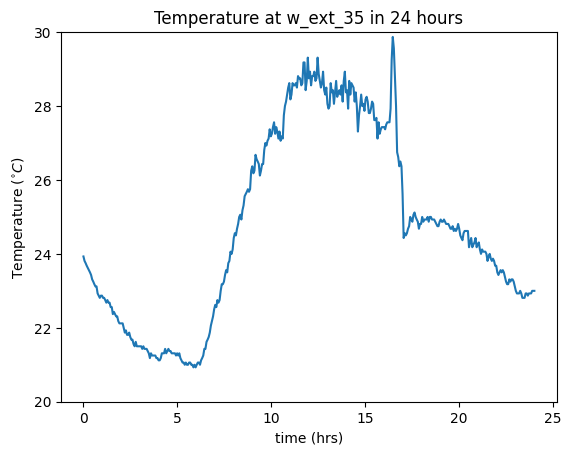

In [ ]:
temp = w_ext_35

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

n = namestr(temp, globals())
print(n[0],'difference = (end of day - start of day) =', temp[-1] - temp[0])
# plot train temp
fig1, ax = plt.subplots()
ax.plot(t_temp, temp)

ax.set(xlabel='time (hrs)', ylabel='Temperature ($^{\circ}C$)',
       title='Temperature at '+n[0]+' in 24 hours')
ax.set_ylim(20, 30)
# # ax.grid()

fig1.savefig(n[0] + date +".eps")
plt.show()

# Import measured weather data

In [ ]:
colnames_weather = ['datetime', 'wind_speed', 'wind_direction', 'humidity', 'air_temperature', 'air_pressure', 'solar_DNI']
url2 = "https://raw.githubusercontent.com/yajuna/pinn_heat/master/Weather_Station_AUG21_to_AUG28_2022.xlsx"
dataWeather = pandas.read_excel(url2,names=colnames_weather)

print(type(dataWeather))
# dataWeather.datetime[432:433]

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# heat parameters
sigma = 5.76e-8
albedo = 0.3

In [ ]:
## index counting and print to check
if date == '08-21':
# August 21:
    [begin, end] = [0, 144]

elif date == '08-22':
# August 22:
    [begin, end] = [144, 288]

elif date == '08-23':
# August 23:
    [begin, end] = [288, 432]
elif date == '08-24':
# August 24:
    [begin, end] = [432, 576]

elif date == '08-25':
# August 25:
    [begin, end] = [576, 720]
elif date == '08-26':
# August 26:
    [begin, end] = [720, 864]
elif date == '08-27':
# August 27:
    [begin, end] = [864, 1008]
elif date == '08-28':
# August 28:
    [begin, end] = [1008, 1152]

In [ ]:
N_weather = int(end - begin)

t_weather = tf.linspace(tmin, tmax, N_weather)

In [ ]:
#### training weather data for source term
# wind speed
train_windSpeed = np.array(dataWeather.wind_speed[begin:end])
# humidity
train_humidity = np.array(dataWeather.humidity[begin:end])
# air temperature
train_airTemp = np.array(dataWeather.air_temperature[begin:end])
# air pressure
train_airPressure = np.array(dataWeather.air_pressure[begin:end])
# solar radiation
train_solar = np.array(dataWeather.solar_DNI[begin:end])

train_solar difference = (end of day - start of day) = -0.020500000000000185


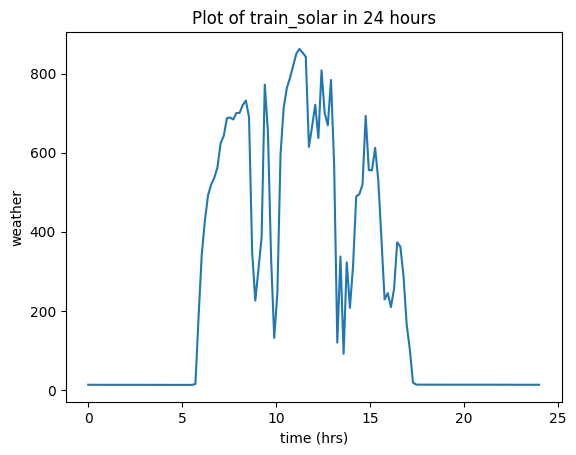

In [ ]:
weather = train_solar

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

nn = namestr(weather, globals())
print(nn[0],'difference = (end of day - start of day) =', weather[-1] - weather[0])
# plot weather
fig1, ax = plt.subplots()
ax.plot(t_weather, weather)

ax.set(xlabel='time (hrs)', ylabel='weather',title='Plot of '+ nn[0] +' in 24 hours')
# ax.set_ylim(lower_limit, upper_limit)
# ax.grid()

fig1.savefig(n[0] + date + ".eps")
plt.show()